# 3. Non-parametric density estimation

In [1]:
import matplotlib.pyplot as plt
import math as m
import numpy as np

with open('hw2/dataSets/nonParamTrain.txt') as f:
    train = [float(x) for x in f.read().splitlines()]
    
with open('hw2/dataSets/nonParamTest.txt') as f:
    test = [float(x) for x in f.read().splitlines()]
    

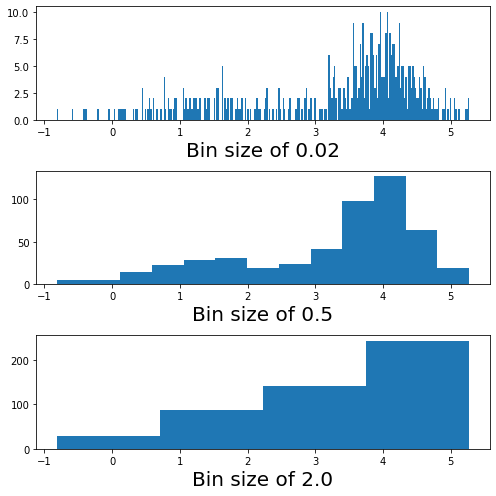

In [2]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7,7))

number_of_bins = m.ceil((max(train) - min(train))/0.02)
ax1.hist(train, bins = number_of_bins)
ax1.set_xlabel('Bin size of 0.02', size=20)

number_of_bins = m.ceil((max(train) - min(train))/0.5)
ax2.hist(train, bins = number_of_bins)
ax2.set_xlabel('Bin size of 0.5', size=20)

number_of_bins = m.ceil((max(train) - min(train))/2.0)
ax3.hist(train, bins = number_of_bins)
ax3.set_xlabel('Bin size of 2.0', size=20)

fig.tight_layout()

(-674.7279387090639, -717.021657744417, -795.6632833459039)

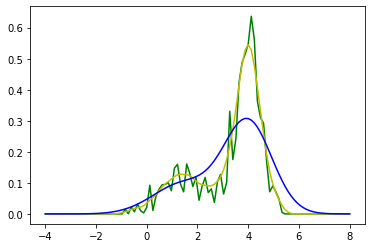

In [110]:
def density_estimate_gaussian(x, h, data):
    return 1/(len(data) * h * m.sqrt(2 * m.pi)) * sum([m.exp(-(np.linalg.norm(x - x_i)**2)/(2*h**2)) for x_i in data])
    
points = np.linspace(-4, 8, 100)

plt.plot(points, [density_estimate_gaussian(x, 0.03, train) for x in points], 'g')
plt.plot(points, [density_estimate_gaussian(x, 0.2, train) for x in points], 'y')
plt.plot(points, [density_estimate_gaussian(x, 0.8, train) for x in points], 'b')

def log_likelihood(data, h, estimator):
    likelihood = 0
    for x in data:
        likelihood += np.log(estimator(x, h, train))
    return likelihood

log_likelihood(train, 0.03, density_estimate_gaussian), log_likelihood(train, 0.2, density_estimate_gaussian), log_likelihood(train, 0.8, density_estimate_gaussian)

(-58.81164004967161, -626.66032428173, -694.67265034462)

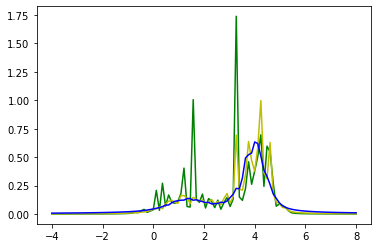

In [111]:
def knn_density_estimator(x, k, data):
    neighbor_distance = [abs(x-y) for y in data]
    neighbor_distance.sort()
    return k/len(data) * 1/(2 * neighbor_distance[k-1]) 

plt.plot(points, [knn_density_estimator(x, 2, train) for x in points], 'g')
plt.plot(points, [knn_density_estimator(x, 8, train) for x in points], 'y')
plt.plot(points, [knn_density_estimator(x, 35, train) for x in points], 'b')

log_likelihood(train, 2, knn_density_estimator), log_likelihood(train, 8, knn_density_estimator), log_likelihood(train, 35, knn_density_estimator)

In [112]:
log_likelihood(test, 0.03, density_estimate_gaussian), log_likelihood(test, 0.2, density_estimate_gaussian), log_likelihood(test, 0.8, density_estimate_gaussian)


/Users/henryhelm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


(-inf, -2904.3420759401183, -3188.8344841562825)

In [113]:
log_likelihood(test, 2, knn_density_estimator), log_likelihood(test, 8, knn_density_estimator), log_likelihood(test, 35, knn_density_estimator)

(-2298.8400065993287, -2708.402865631286, -2786.4836503309807)

# 2. Density Estimation

In [7]:
import numpy as np
from IPython.display import HTML, display
import tabulate

def read_data(file):
    with open(file) as f:
        data = f.readlines()
    datapoints = [[float((row.strip().split('  ')[0])), float((row.strip().split('  ')[1]))] for row in data]
    return datapoints

dataset1 = read_data("hw2/dataSets/densEst1.txt")
dataset2 = read_data("hw2/dataSets/densEst2.txt")

def compute_mean(datapoints):
    return np.sum(datapoints, axis=0) / len(datapoints)
    
def compute_variance(datapoints, mean, biased=True):
    sum = np.sum((datapoints - mean)**2, axis=0)
    if biased:
        return sum / len(datapoints)
    else:
        return sum / (len(datapoints) - 1)
    
mean1 = compute_mean(dataset1)
mean2 = compute_mean(dataset2)
variance1_biased = compute_variance(dataset1, mean1)
variance2_biased = compute_variance(dataset2, mean2)
variance1_unbiased = compute_variance(dataset1, mean1, biased=False)
variance2_unbiased = compute_variance(dataset2, mean2, biased=False)

table = [["","densEst1", "densEst2"],
         ["Mean",mean1, mean2],
         ["Variance (biased)", variance1_biased, variance2_biased],
         ["Variance (unbiased)", variance1_unbiased, variance2_unbiased]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

,densEst1,densEst2
Mean,[-0.70681374 -0.81343083],[3.98534252 3.98438364]
Variance (biased),[9.01952586 3.59633965],[4.1753815 2.75296323]
Variance (unbiased),[9.05742302 3.61145033],[4.18087542 2.75658555]


Text(0.5, 0, 'denstEst2')

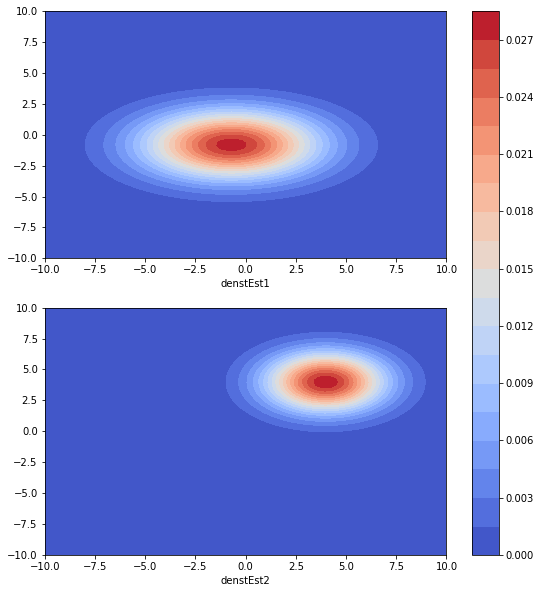

In [8]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, y, mean, variance):
     return np.exp(-0.5 * ((x - mean[0])**2/variance[0] + (y - mean[1])**2/variance[1])) / (2 * m.pi * m.sqrt(variance[0] * variance[1]))
           

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
density_class1 = gaussian(X, Y, mean1, variance1_unbiased) 
density_class2 = gaussian(X, Y, mean2, variance2_unbiased)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10))
plot =ax1.contourf(X, Y, density_class1, 20, cmap="coolwarm")
ax1.set_xlabel("denstEst1")
fig.colorbar(plot, ax=fig.get_axes())

ax2.contourf(X, Y, density_class2, 20, cmap="coolwarm")
ax2.set_xlabel("denstEst2")




Text(0.5, 1.0, 'Red - Class 1, Blue - Class 2')

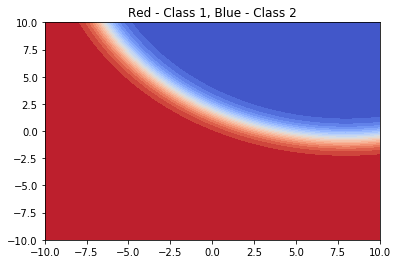

In [9]:
import numpy as np
import matplotlib.pyplot as plt


prior_class1 = 0.239
prior_class2 = 0.761

normalization_factor = density_class1 * prior_class1 + density_class2 * prior_class2
posterior_class1 = density_class1 * prior_class1 / normalization_factor
posterior_class2 = density_class2 * prior_class2 / normalization_factor
   

plt.contourf(X, Y, (posterior_class1 - posterior_class2), 20, cmap="coolwarm")
plt.title("Red - Class 1, Blue - Class 2")


# 4. Expectation Maximization

In [97]:
from math import pi, sqrt, log, exp
import numpy as np
import matplotlib.pyplot as plt

parameters_per_iteration = []

# means, variances and weights contain the initial parameters for each component inside an array
def gaussian(x, y, mean, variance):
    return np.exp(-0.5 * ((x - mean[0])**2/variance[0] + (y - mean[1])**2/variance[1])) \
        / (2 * m.pi * sqrt(variance[0] * variance[1]))
     

def estimation_maximization(x, y, means, variances, weights):
    
    def e_step(comp):
        return (weights[comp] * gaussian(x, y, means[comp], variances[comp])) \
            / sum([weights[i] * gaussian(x, y, means[i], variances[i]) for i in range(4)])

    
    def m_step(responsibilities):
        Nj = sum(responsibilities)
        N = len(x)
        mean = 1/Nj * np.array([responsibilities.dot(x), responsibilities.dot(y)])
        variance = 1/Nj * np.array([responsibilities.dot((x - mean[0])**2), 
                                    responsibilities.dot((y - mean[1])**2)])
        weight = Nj / N
        return mean, variance, weight
    
    
    
    def multi_gaussian(x, y, means, variances, weights):
        return sum([weights[i] * gaussian(x, y, means[i], variances[i]) for i in range(4)])
    
    
    for i in range(30):
        responsibilities_comp1 = e_step(0)
        responsibilities_comp2 = e_step(1)
        responsibilities_comp3 = e_step(2)
        responsibilities_comp4 = e_step(3)
    
        mean_comp1, variance_comp1, weight_comp1 = m_step(responsibilities_comp1)
        mean_comp2, variance_comp2, weight_comp2 = m_step(responsibilities_comp2)
        mean_comp3, variance_comp3, weight_comp3 = m_step(responsibilities_comp3)
        mean_comp4, variance_comp4, weight_comp4 = m_step(responsibilities_comp4)
        
        means = [mean_comp1, mean_comp2, mean_comp3, mean_comp4]
        variances = [variance_comp1, variance_comp2, variance_comp3, variance_comp4]
        weights = [weight_comp1, weight_comp2, weight_comp3, weight_comp4]
        
        log_likelihood = 0
        for j in range(len(x)):
            log_likelihood =+ log(multi_gaussian(x[j], y[j], means, variances, weights))
        
        print(i, log_likelihood)
        
        parameters_per_iteration.append([means, variances])

def read_data(file):
    with open(file) as f:
        data = f.readlines()
    x = [float((row.strip().split('  ')[0])) for row in data]
    y = [float((row.strip().split('  ')[1])) for row in data]
    return x, y


x, y = read_data("hw2/dataSets/gmm.txt")
initial_means = [[2, 3], [2, 0.8], [0, 0.5], [0, 2]]
initial_variances = [[1, 1], [1, 1], [1, 1], [1, 1]]
initial_weights = [0.25, 0.25, 0.25, 0.25]

x = np.asarray(x)
y = np.asarray(y)
estimation_maximization(x, y, initial_means, initial_variances, initial_weights)


Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
0 -2.3706420075257886
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
1 -1.9367272762580476
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
2 -1.5987146863428114
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
3 -1.489265218737977
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
4 -1.4768660750352771
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
5 -1.4679702162469246
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
6 -1.4592419370017284
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
7 -1.4508437862974366
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
8 -1.4429239511931793
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
9 -1.4359851137049848
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
10 -1.4305415916329447
Mean shape (2,)
Mean shape (2,)
Mean shape (2,)
Mean s

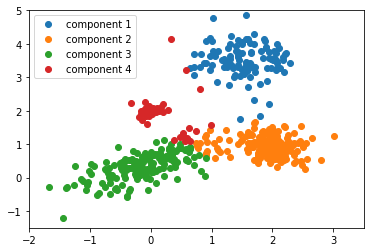

In [88]:
parameters_for_iteration1 = parameters_per_iteration[0]
parameters_for_iteration3 = parameters_per_iteration[2]
parameters_for_iteration5 = parameters_per_iteration[4]
parameters_for_iteration10 = parameters_per_iteration[9]
parameters_for_iteration30 = parameters_per_iteration[29]


def plot_graph_for_iteration(parameters):
    most_likely_generated_by_comp1 = [[], []]
    most_likely_generated_by_comp2 = [[], []]
    most_likely_generated_by_comp3 = [[], []]
    most_likely_generated_by_comp4 = [[], []]

    for i in range(len(x)):
        density_comp1 = gaussian(x[i], y[i], parameters[0][0], parameters[1][0])
        density_comp2 = gaussian(x[i], y[i], parameters[0][1], parameters[1][1])
        density_comp3 = gaussian(x[i], y[i], parameters[0][2], parameters[1][2])
        density_comp4 = gaussian(x[i], y[i], parameters[0][3], parameters[1][3])
    
        # find the maximum density
        if density_comp1 > density_comp2 and density_comp1 > density_comp3 and density_comp1 > density_comp4:
            most_likely_generated_by_comp1[0].append(x[i])
            most_likely_generated_by_comp1[1].append(y[i])
        elif density_comp2 > density_comp1 and density_comp2 > density_comp3 and density_comp2 > density_comp4:
            most_likely_generated_by_comp2[0].append(x[i])
            most_likely_generated_by_comp2[1].append(y[i])
        elif density_comp3 > density_comp1 and density_comp3 > density_comp2 and density_comp3 > density_comp4:
            most_likely_generated_by_comp3[0].append(x[i])
            most_likely_generated_by_comp3[1].append(y[i])
        else:
            most_likely_generated_by_comp4[0].append(x[i])
            most_likely_generated_by_comp4[1].append(y[i])


    plt.plot(most_likely_generated_by_comp1[0], most_likely_generated_by_comp1[1], 'o', label="component 1")
    plt.plot(most_likely_generated_by_comp2[0], most_likely_generated_by_comp2[1], 'o', label="component 2")
    plt.plot(most_likely_generated_by_comp3[0], most_likely_generated_by_comp3[1], 'o', label="component 3")
    plt.plot(most_likely_generated_by_comp4[0], most_likely_generated_by_comp4[1], 'o', label="component 4")
    plt.xlim(-2, 3.5)
    plt.ylim(-1.5, 5)
    plt.legend()

    
plot_graph_for_iteration(parameters_for_iteration1)


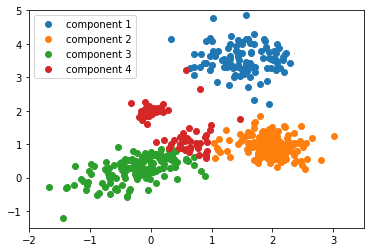

In [89]:
plot_graph_for_iteration(parameters_for_iteration3)

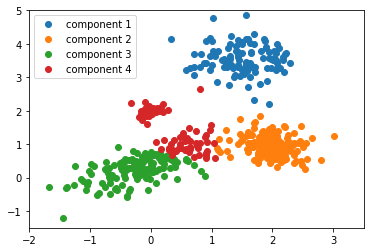

In [90]:
plot_graph_for_iteration(parameters_for_iteration5)

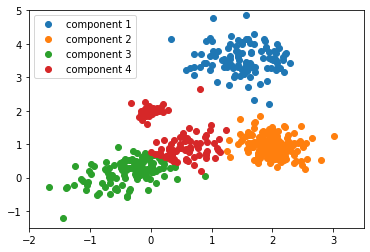

In [91]:
plot_graph_for_iteration(parameters_for_iteration10)

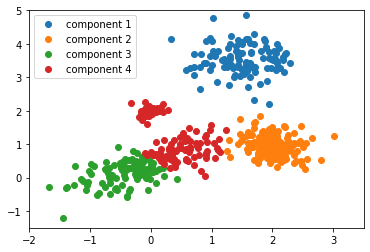

In [92]:
plot_graph_for_iteration(parameters_for_iteration30)